   # PROJECT ID :  "PRCP-1010-InsClaimPred"

 

# Project Team ID : "PTID-CDS-APR-23-1489" 

# Problem Statement : 

   ### Task 1 :
   - Create a predictive model which will help the insurance marketing team to know which customer will                          claim the insurance.

   ### Task 2 :
   - Suggestions to the Insurance market team to make  customers  buy the product.







## Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# importing metrics for model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score, recall_score, precision_score

In [2]:
# To Avoid Warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset

data = pd.read_csv('train.csv')
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


## Exploratory Data Analysis:

   ### Feature and feature names are unfamiliar hence we are skipping EDA. 

# Basic checks

In [4]:
# To display first 5 rows of the dataset

data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
# To display last 5 rows of the dataset


data.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [6]:
# Getting all columns from the dataset

data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [7]:
# To get number of rows and columns of the dataset

data.shape

(595212, 59)

In [8]:
# Print a concise summary of a DataFrame. 
# This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [9]:
# To check all the null values from the dataset

data.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [10]:
# To check the type of features.

data.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [11]:
# To check the count of object and numerical columns

print('Object columns count: ', data.dtypes[data.dtypes==object].count())
print('Numerical columns count: ', data.dtypes[data.dtypes!=object].count())


Object columns count:  0
Numerical columns count:  59


In [12]:
# To find unique value in target

data['target'].unique()

array([0, 1], dtype=int64)

In [13]:
# To find the value count of the classes in target column

data['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

## Target Analysis
### This column signifies whether or not the claim was filed for that policy holder.

- Claimed
- Didn't claim




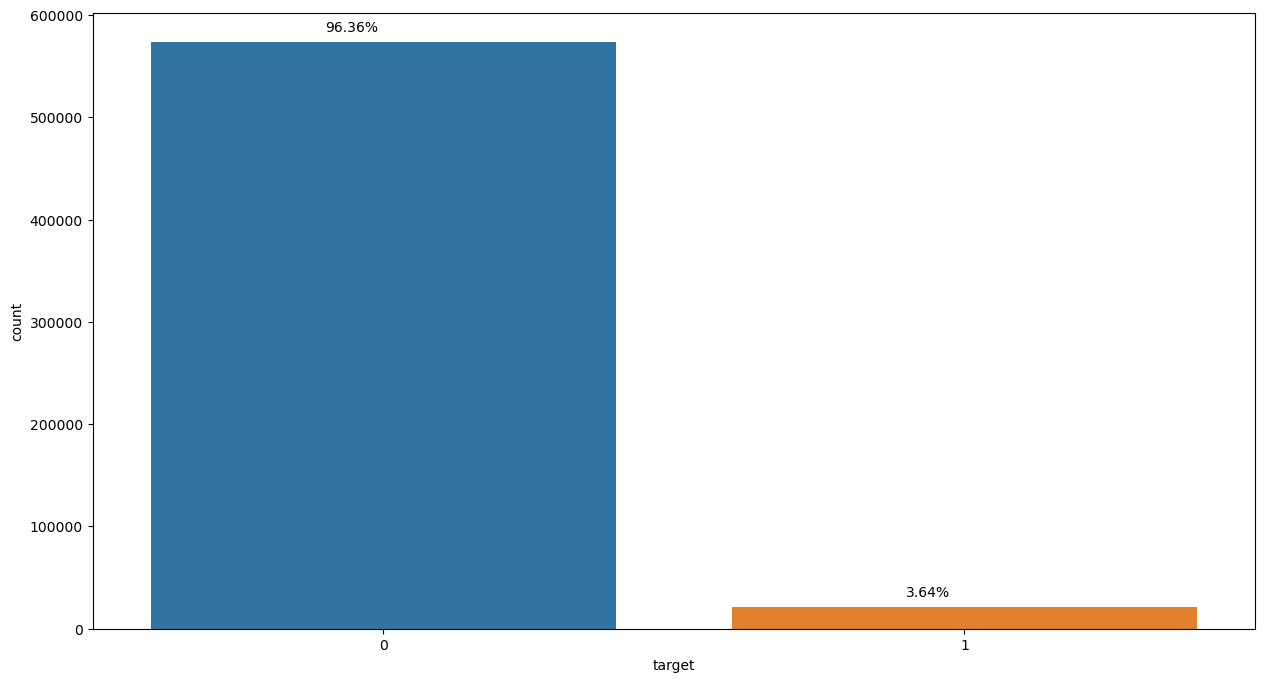

In [14]:
plt.figure(figsize=(15,8))


ax = sns.countplot('target', data=data)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(data['target'])), 
                (p.get_x() + 0.3, p.get_height() + 10000))

- From the given data, 96.36% of people will not claim the insurance 
- 3.64% of people will claim the insurance

## Statistical Analysis

In [15]:
# To view some basic statistical details like mean, standard deviation, percentile, etc

# it helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [16]:
# Deleting irrelevant columns

data.drop(['id'],axis=1,inplace=True)
data

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [17]:
# To determine the data type

type(data)

pandas.core.frame.DataFrame

In [18]:
# splitting dataset into X and y

X = data.iloc[:,1:58]
y = data.target

In [19]:
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Checking distribution of the data using 'Distplot'

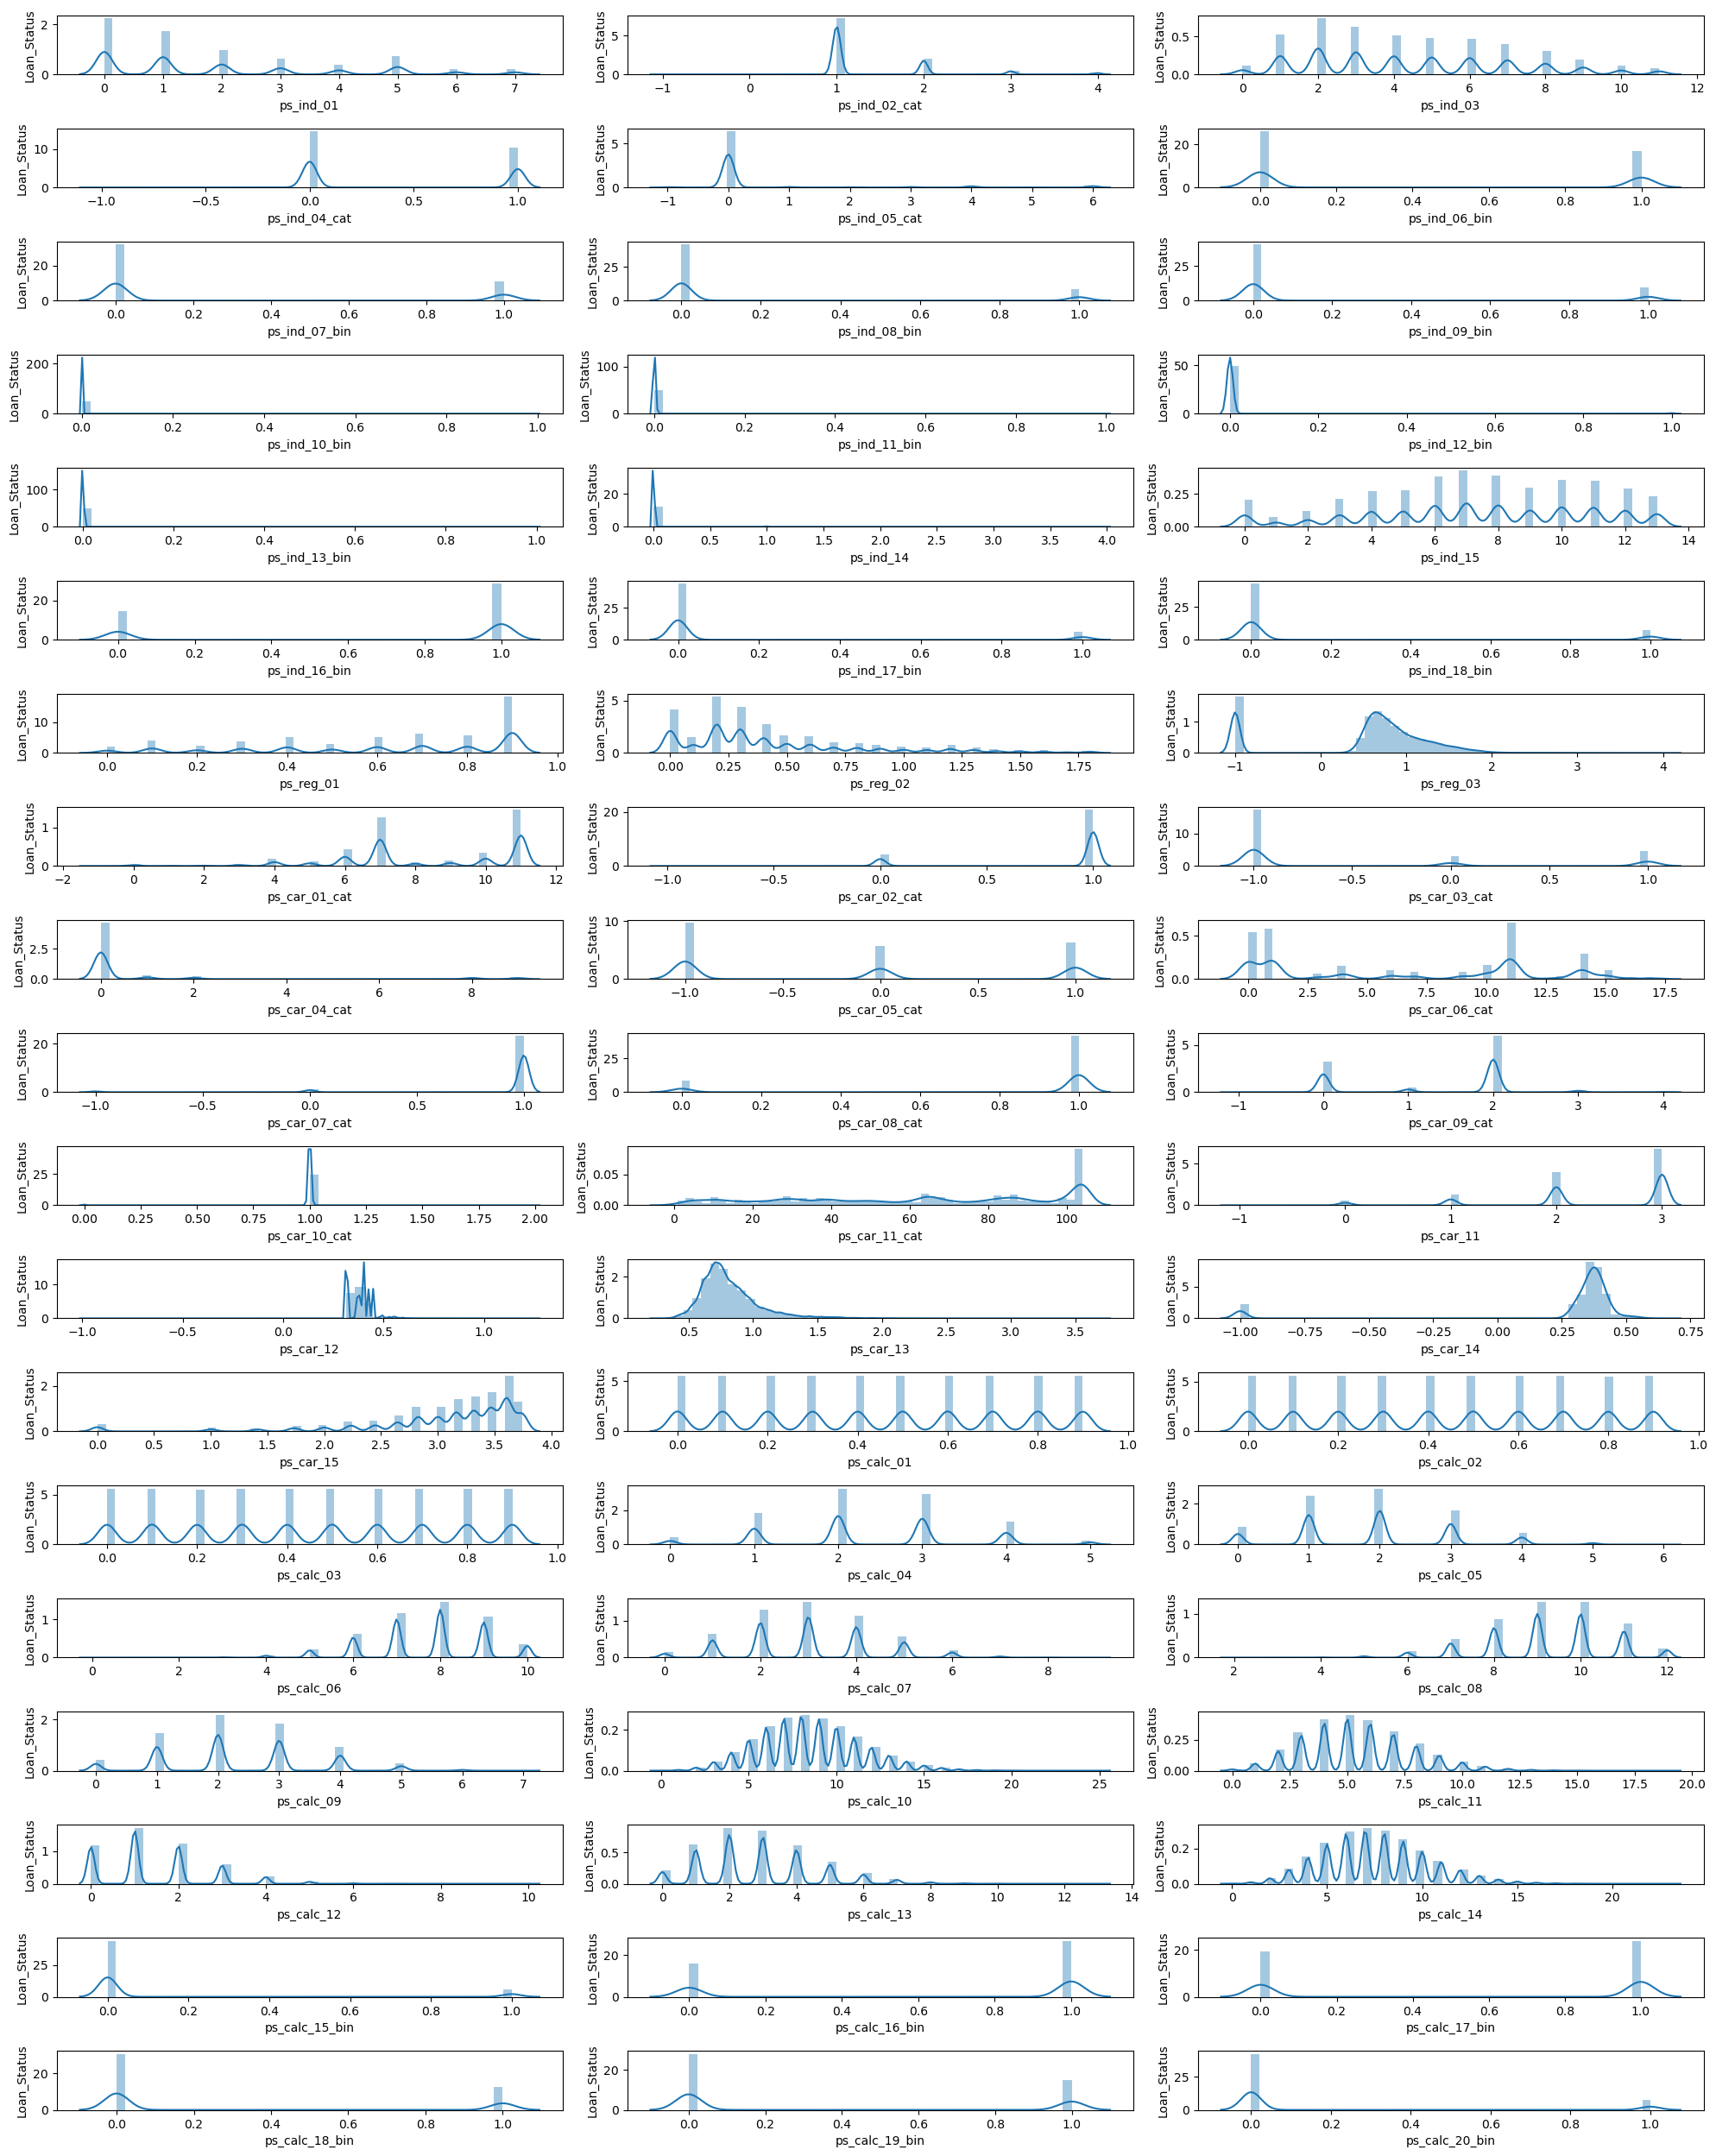

In [20]:
plt.figure(figsize=(20,25), facecolor='white') #to set canvas

plotnumber = 1 #counter

for column in X: #accessing the columns

    if plotnumber<=57 :

        ax = plt.subplot(19,3,plotnumber)

        sns.distplot(x=X[column])

        plt.xlabel(column) #assign name to x axis and set font 20

        plt.ylabel('Loan_Status')

    plotnumber+=1 #counter increment

plt.tight_layout()

## From the above plots, we conclude :

- The data is non linear.
- The data is highly imbalanced.
- Most of the data is skewed.
- The data has no normal distribution except for few data.


# Using IQR method to handle Outliers

In [21]:
# First quantile (Q1) 
Q1 = data.quantile(0.25)

# Third quantile (Q3)
Q3 = data.quantile(0.75)

# IQR value
IQR = Q3-Q1

# Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

# Sum of outliers
outliers_count = ((data > max_limit) | (data < min_limit)).sum()

# Percentage of outliers
outliers_percentage = (outliers_count/len(data))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  target             21694
ps_ind_01              0
ps_ind_02_cat      11594
ps_ind_03              0
ps_ind_04_cat          0
ps_ind_05_cat      67203
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin      97568
ps_ind_09_bin     110295
ps_ind_10_bin        222
ps_ind_11_bin       1007
ps_ind_12_bin       5618
ps_ind_13_bin        564
ps_ind_14           6380
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin      72069
ps_ind_18_bin      91333
ps_reg_01              0
ps_reg_02          36793
ps_reg_03         120865
ps_car_01_cat       6011
ps_car_02_cat     101222
ps_car_03_cat          0
ps_car_04_cat      98631
ps_car_05_cat          0
ps_car_06_cat          0
ps_car_07_cat      42064
ps_car_08_cat      99948
ps_car_09_cat          0
ps_car_10_cat       5033
ps_car_11_cat          0
ps_car_11          25988
ps_car_12          15356
ps_car_13          26913
ps_car_14          58905
ps_car_15          27409
ps_calc_01             0
ps_c

- We are handling the columns with outliers below 2 percentage,
- If we handle the outliers above 2 percantage then it will affect the original data
- So we conclude that the columns with outliers listed below should be handled:

   1).ps_ind_02_cat

   2).ps_ind_10_bin

   3).ps_ind_11_bin

   4).ps_ind_12_bin

   5).ps_ind_13_bin

   6).ps_ind_14
   
   7).ps_car_01_cat 
   
   8).ps_car_10_cat
   
   9).ps_calc_06
   
   10).ps_calc_07
   
   11).ps_calc_08
   
   12).ps_calc_09
   
   13).ps_calc_10
   
   14).ps_calc_11
   
   15).ps_calc_13

## 1).ps_ind_02_cat

In [22]:
# First quantile (Q1) 
Q1 = data.ps_ind_02_cat.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_02_cat.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [23]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_02_cat'] < min_limit,'ps_ind_02_cat']=np.median(data.ps_ind_02_cat)

data.loc[data['ps_ind_02_cat'] > max_limit,'ps_ind_02_cat']=np.median(data.ps_ind_02_cat)

<AxesSubplot:xlabel='ps_ind_02_cat'>

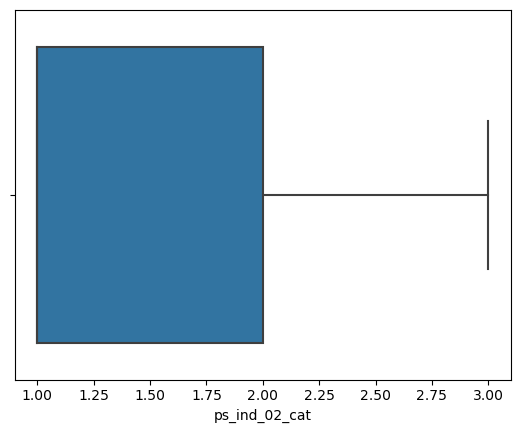

In [24]:
sns.boxplot(data.ps_ind_02_cat)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 2).ps_ind_10_bin

In [25]:
# First quantile (Q1) 
Q1 = data.ps_ind_10_bin.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_10_bin.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [26]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_10_bin'] < min_limit,'ps_ind_10_bin']=np.median(data.ps_ind_10_bin)

data.loc[data['ps_ind_10_bin'] > max_limit,'ps_ind_10_bin']=np.median(data.ps_ind_10_bin)

<AxesSubplot:xlabel='ps_ind_10_bin'>

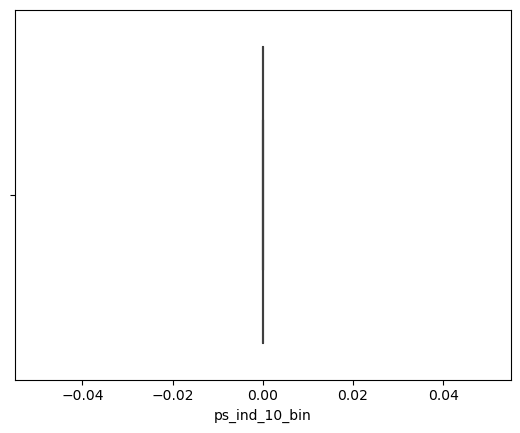

In [27]:
sns.boxplot(data.ps_ind_10_bin)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 3).ps_ind_11_bin

In [28]:
# First quantile (Q1) 
Q1 = data.ps_ind_11_bin.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_11_bin.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [29]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_11_bin'] < min_limit,'ps_ind_11_bin']=np.median(data.ps_ind_11_bin)

data.loc[data['ps_ind_11_bin'] > max_limit,'ps_ind_11_bin']=np.median(data.ps_ind_11_bin)



<AxesSubplot:xlabel='ps_ind_11_bin'>

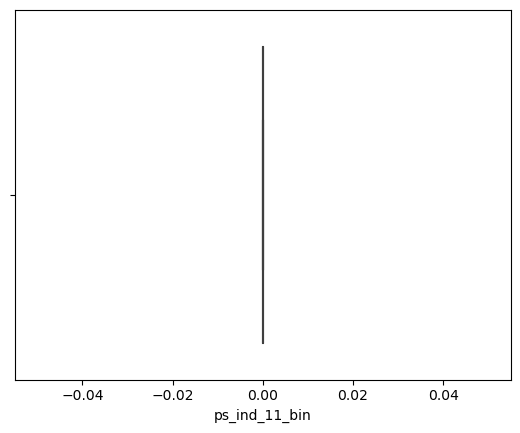

In [30]:
sns.boxplot(data.ps_ind_11_bin)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 4).ps_ind_12_bin

In [31]:
# First quantile (Q1) 
Q1 = data.ps_ind_12_bin.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_12_bin.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [32]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_12_bin'] < min_limit,'ps_ind_12_bin']=np.median(data.ps_ind_12_bin)

data.loc[data['ps_ind_12_bin'] > max_limit,'ps_ind_12_bin']=np.median(data.ps_ind_12_bin)



<AxesSubplot:xlabel='ps_ind_12_bin'>

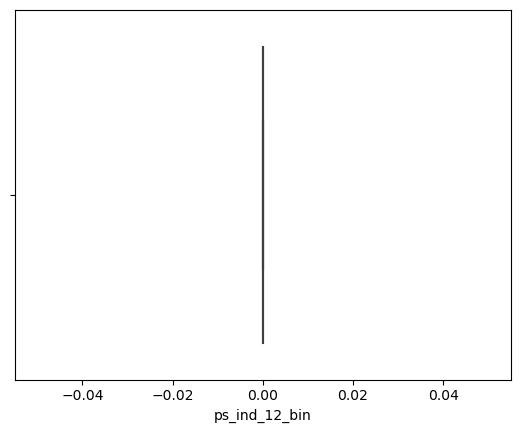

In [33]:
sns.boxplot(data.ps_ind_12_bin)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 5).ps_ind_13_bin

In [34]:
# First quantile (Q1) 
Q1 = data.ps_ind_13_bin.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_13_bin.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [35]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_13_bin'] < min_limit,'ps_ind_13_bin']=np.median(data.ps_ind_13_bin)

data.loc[data['ps_ind_13_bin'] > max_limit,'ps_ind_13_bin']=np.median(data.ps_ind_13_bin)



<AxesSubplot:xlabel='ps_ind_13_bin'>

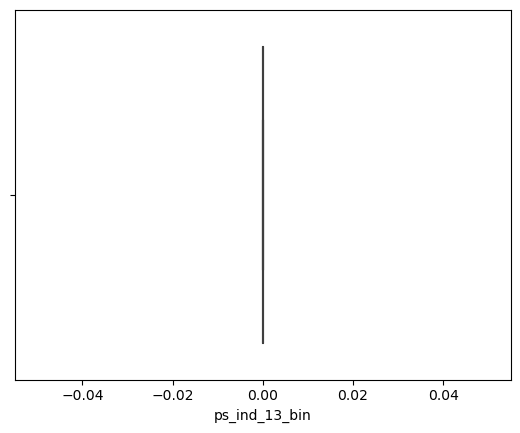

In [36]:
sns.boxplot(data.ps_ind_13_bin)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 6).ps_ind_14

In [37]:
# First quantile (Q1) 
Q1 = data.ps_ind_14.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_ind_14.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [38]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_ind_14'] < min_limit,'ps_ind_14']=np.median(data.ps_ind_13_bin)

data.loc[data['ps_ind_14'] > max_limit,'ps_ind_14']=np.median(data.ps_ind_13_bin)



<AxesSubplot:xlabel='ps_ind_14'>

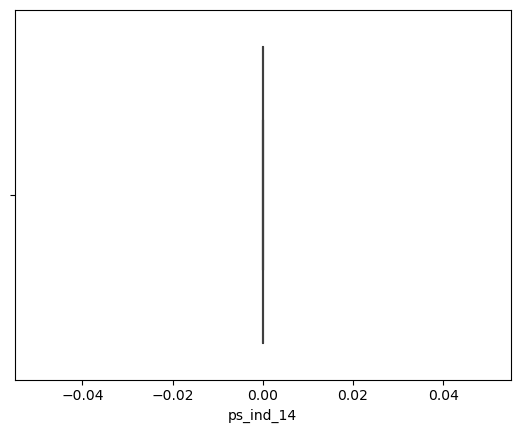

In [39]:
sns.boxplot(data.ps_ind_14)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 7).ps_car_01_cat

In [40]:
# First quantile (Q1) 
Q1 = data.ps_car_01_cat.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_car_01_cat.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [41]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_car_01_cat'] < min_limit,'ps_car_01_cat']=np.median(data.ps_car_01_cat)

data.loc[data['ps_car_01_cat'] > max_limit,'ps_car_01_cat']=np.median(data.ps_car_01_cat)



<AxesSubplot:xlabel='ps_car_01_cat'>

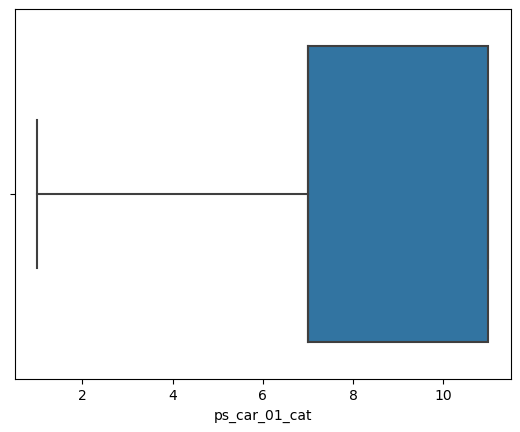

In [42]:
sns.boxplot(data.ps_car_01_cat)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 8).ps_car_10_cat

In [43]:
# First quantile (Q1) 
Q1 = data.ps_car_10_cat.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_car_10_cat.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [44]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_car_10_cat'] < min_limit,'ps_car_10_cat']=np.median(data.ps_car_10_cat)

data.loc[data['ps_car_10_cat'] > max_limit,'ps_car_10_cat']=np.median(data.ps_car_10_cat)



<AxesSubplot:xlabel='ps_car_10_cat'>

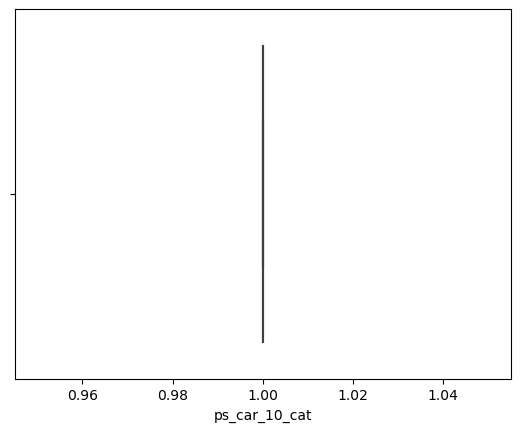

In [45]:
sns.boxplot(data.ps_car_10_cat)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 9).ps_calc_06

In [46]:
# First quantile (Q1) 
Q1 = data.ps_calc_06.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_06.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [47]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_06'] < min_limit,'ps_calc_06']=np.median(data.ps_calc_06)

data.loc[data['ps_calc_06'] > max_limit,'ps_calc_06']=np.median(data.ps_calc_06)


<AxesSubplot:xlabel='ps_calc_06'>

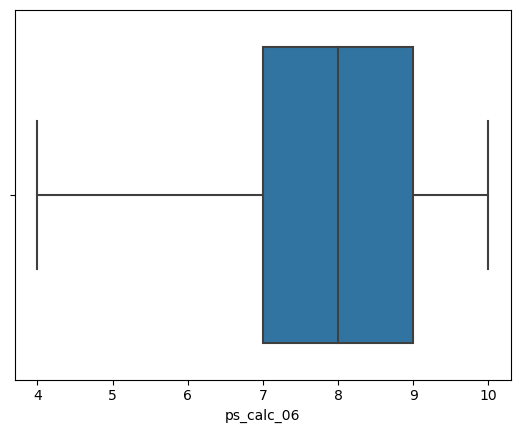

In [48]:
sns.boxplot(data.ps_calc_06)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 10).ps_calc_07

In [49]:
# First quantile (Q1) 
Q1 = data.ps_calc_07.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_07.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [50]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_07'] < min_limit,'ps_calc_07']=np.median(data.ps_calc_07)

data.loc[data['ps_calc_07'] > max_limit,'ps_calc_07']=np.median(data.ps_calc_07)


<AxesSubplot:xlabel='ps_calc_07'>

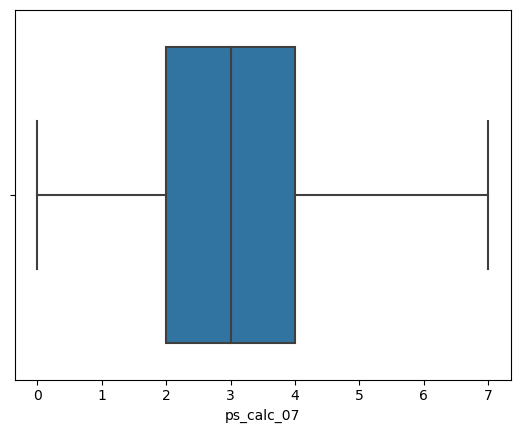

In [51]:
sns.boxplot(data.ps_calc_07)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 11).ps_calc_08

In [52]:
# First quantile (Q1) 
Q1 = data.ps_calc_08.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_08.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [53]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_08'] < min_limit,'ps_calc_08']=np.median(data.ps_calc_08)

data.loc[data['ps_calc_08'] > max_limit,'ps_calc_08']=np.median(data.ps_calc_08)


<AxesSubplot:xlabel='ps_calc_08'>

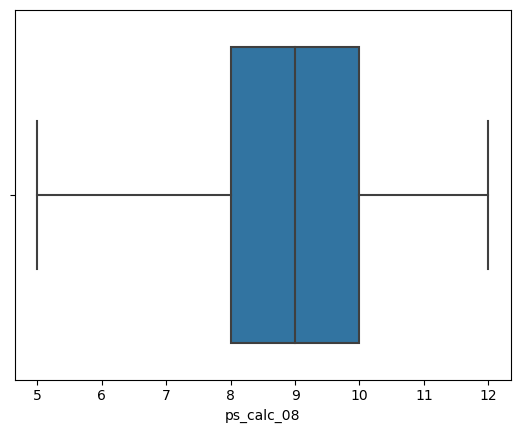

In [54]:
sns.boxplot(data.ps_calc_08)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 12).ps_calc_09

In [55]:
# First quantile (Q1) 
Q1 = data.ps_calc_09.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_09.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [56]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_09'] < min_limit,'ps_calc_09']=np.median(data.ps_calc_09)

data.loc[data['ps_calc_09'] > max_limit,'ps_calc_09']=np.median(data.ps_calc_09)


<AxesSubplot:xlabel='ps_calc_09'>

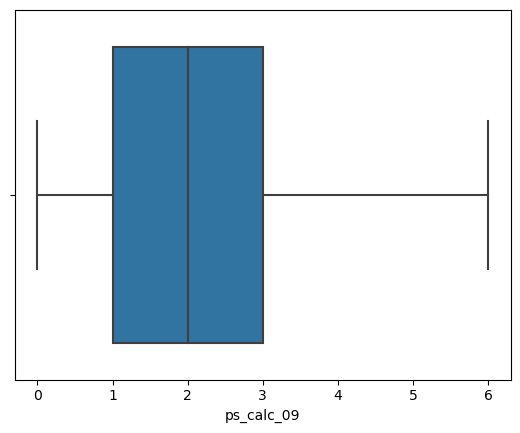

In [57]:
sns.boxplot(data.ps_calc_09)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 13).ps_calc_10

In [58]:
# First quantile (Q1) 
Q1 = data.ps_calc_10.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_10.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [59]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_10'] < min_limit,'ps_calc_10']=np.median(data.ps_calc_10)

data.loc[data['ps_calc_10'] > max_limit,'ps_calc_10']=np.median(data.ps_calc_10)


<AxesSubplot:xlabel='ps_calc_10'>

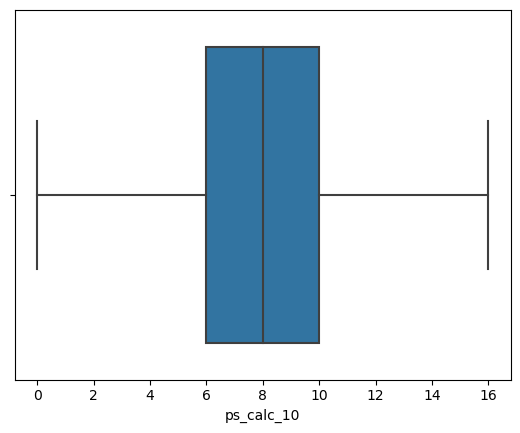

In [60]:
sns.boxplot(data.ps_calc_10)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 14).ps_calc_11

In [61]:
# First quantile (Q1) 
Q1 = data.ps_calc_11.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_11.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [62]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_11'] < min_limit,'ps_calc_11']=np.median(data.ps_calc_11)

data.loc[data['ps_calc_11'] > max_limit,'ps_calc_11']=np.median(data.ps_calc_11)


<AxesSubplot:xlabel='ps_calc_11'>

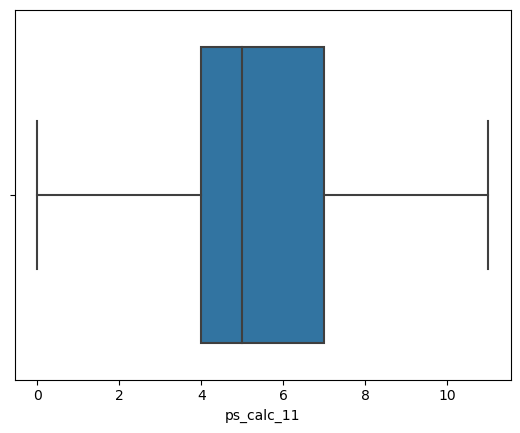

In [63]:
sns.boxplot(data.ps_calc_11)

- From this Boxplot, we conclude that we have replaced the outliers with median value

## 15).ps_calc_13

In [64]:
# First quantile (Q1) 
Q1 = data.ps_calc_13.quantile(0.25)

# Third quantile (Q3)
Q3 = data.ps_calc_13.quantile(0.75)

# IQR value
IQR = Q3-Q1

#Getting the limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [65]:
# Since data is not normal replacing outliers with median

data.loc[data['ps_calc_13'] < min_limit,'ps_calc_13']=np.median(data.ps_calc_13)

data.loc[data['ps_calc_13'] > max_limit,'ps_calc_13']=np.median(data.ps_calc_13)


<AxesSubplot:xlabel='ps_calc_13'>

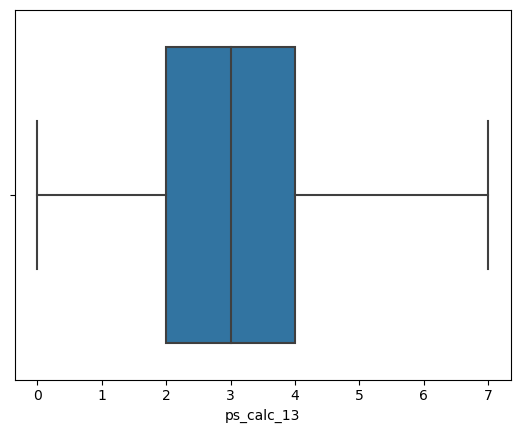

In [66]:
sns.boxplot(data.ps_calc_13)

- From this Boxplot, we conclude that we have replaced the outliers with median value

In [67]:
# splitting dataset into X and y

X = data.iloc[:,1:58]
y = data.target

In [68]:
'''
# Logarathmic transformation 

X = np.log(X)
X.head()'''


'\n# Logarathmic transformation \n\nX = np.log(X)\nX.head()'

- Applied "LOGARITHMIC TRANSFORMATION" method to convert non-linear input data to linear data.
- But after conversion most of the values were changed to infinity or null values hence skipped this.

# TRAIN TEST SPLIT:


## The train-test split is a technique for evaluating the performance of a machine learning  algorithm.

#### Train Dataset: 
- Used to train the machine learning model.

#### Test Dataset:
- Used to evaluate the machine learning model.

#### Common split percentages include:

- Train: 80%,   Test: 20%

- Train: 67%,   Test: 33%

- Train: 50%,   Test: 50%

- I've used  80%  train and  20%  test

In [69]:
# To split a dataset into two subsets: one for training the model, and one for testing the model's performance.
from sklearn.model_selection import train_test_split

# Create train and test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

In [70]:
# Checking the dimension of our train and test splits
print('Shape of x_train: ',x_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (446409, 57)
Shape of y_train:  (446409,)
Shape of x_test:  (148803, 57)
Shape of y_test:  (148803,)


# Classification Algorithms:


- Logistic regression
- Decision Tree
- Random Forest
- xgboost


## The models include the following:-

### a. Hyper Parameter Tuning

#### 1. What Is Hyperparameter Tuning?

- Hyperparameters are the variables that the user specify usually while building the Machine Learning model. 
- Thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. 
- The best part about hyperparameters is that their values are decided by the user who is building the model. 
- For example, max_depth in Random Forest Algorithms, k in KNN Classifier. 
- Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models.


#### 2. What Steps To Follow For Hyper Parameter Tuning?

- Select the type of model we want to use like RandomForestClassifier, regressor or any other model
- Check what are the parameters of the model
- Select the methods for searching the hyperparameter
- Select the cross-validation approach
- Evaluate the model using the score


#### b. Fit Best Model

#### c. Predict on testing data using that model

#### d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

#### Confusion Matrix :
- It is a tabular visualization of the model predictions versus the ground-truth labels.


#### F1 Score :
- It’s the harmonic mean between precision and recall.


#### Precision Score :
- Precision is the fraction of predicted positives/negatives events that are actually positive/negatives.


#### Recall Score :
- It is the fraction of positives/negative events that you predicted correctly.


#### I've given preference to F1 Scoring because :
- When you have a small positive class, then F1 score makes more sense.In this case the positive class number is almost half of the negative class.

- F1-score is a better metric when there are imbalanced classes as in the above case.

- F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall

## Model Building and Performation Evaluation:

## Logistic Regression

In [71]:
# importing Logistic Regression model from the library
from sklearn.linear_model import LogisticRegression

# object creation
model_lr = LogisticRegression(solver='liblinear')

# fitting the model
model_lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [72]:
# predicting the values

y_pred_lr = model_lr.predict(x_test)

In [73]:
# checking accuracy for logistic model

accuracy_score(y_test,y_pred_lr)

0.9632601493249464

In [74]:
# checking classification report for logistic model

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143336
           1       0.00      0.00      0.00      5467

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



In [75]:
# using confusion matrix to evaluate the classifications

confusion_matrix(y_test,y_pred_lr)

array([[143336,      0],
       [  5467,      0]], dtype=int64)

- Logistic Regression model is overfitting hence we are changing the model. 

## Random Forest Classifier

In [76]:
# importing model
from sklearn.ensemble import RandomForestClassifier

# object creation
model_RF = RandomForestClassifier()

# fitting the data
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_RF = model_RF.predict(x_test)

In [78]:
# Checking accuracy score for Random Forest Model

accuracy_score(y_test,y_pred_RF)

0.9632601493249464

In [79]:
# using confusion matrix to evaluate the classifications


confusion_matrix(y_test,y_pred_RF)

array([[143336,      0],
       [  5467,      0]], dtype=int64)

In [80]:
# checking classification report for Random Forest model

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    143336
           1       0.00      0.00      0.00      5467

    accuracy                           0.96    148803
   macro avg       0.48      0.50      0.49    148803
weighted avg       0.93      0.96      0.95    148803



- By the above model's evaluation we coclude that,the data has imbalanced classes and the models are overfitting.

- To overcome this issue and improve model performance we are using following techniques.

# Oversampling

### Since our dataset is imbalanced we use oversampling technique to balance the class distribution in our imbalanced datasets by increasing the number of instances in the minority class. It helps in improving the performance of our model, avoid bias and to address data availability issues. 

In [81]:
# To split a dataset into two subsets: one for training the model, and one for testing the model's performance.
from sklearn.model_selection import train_test_split

# Create train and test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

In [82]:
# importing the resample function to use it to perform resampling on our dataset. 

from sklearn.utils import resample

In [83]:
# Concatenation
New_data_os = pd.concat([x_train,y_train],axis=1)

# Displaying the first 5 rows
New_data_os.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
170137,3,1,4,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,1.2,1.904436,8,1,0,0,0,10,1,1,2,1,89,2,0.387298,0.909659,0.336155,3.316625,0.5,0.6,0.0,4,1,6,4,10,3,6,2,2,3,6,1,1,0,0,1,0,1
172936,1,1,6,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.6,0.2,0.641288,4,1,-1,0,0,0,1,1,0,1,46,3,0.400000,0.820338,0.366333,3.605551,0.3,0.1,0.5,0,2,7,2,7,3,3,6,4,1,5,0,1,1,1,0,0,0
482553,0,1,8,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,0.9,0.1,0.483477,7,1,-1,0,-1,0,1,1,2,1,39,3,0.316070,0.623987,0.374433,2.449490,0.0,0.2,0.9,3,3,9,3,10,2,6,3,1,3,7,0,0,0,0,0,0,0
266544,0,2,3,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.3,0.0,0.725431,10,1,-1,0,0,1,1,1,0,1,25,2,0.400000,0.857153,-1.000000,3.605551,0.0,0.7,0.2,3,1,8,5,10,0,10,5,0,4,10,0,1,1,0,0,0,0
547772,2,1,8,0,6,1,0,0,0,0,0,0,0,0,3,0,1,0,0.7,0.6,-1.000000,7,1,-1,0,-1,14,1,1,3,1,82,3,0.316070,0.575319,0.365103,2.236068,0.2,0.7,0.5,2,1,9,4,9,3,7,6,3,2,4,0,0,1,0,1,0,0


In [84]:
class_0 = New_data_os[New_data_os.target==0] # Class 0 is persons will not take insurance
class_1 = New_data_os[New_data_os.target==1] # class 1 is persons will take insurance

# upsample minority 
class_upsampled = resample(class_1,
                           replace=True, # sample with replacement
                           n_samples=len(class_0), # match number in majority class
                           random_state=27) # reproducible results



# combine majority and upsampled minority 
upsampled = pd.concat([class_0, class_upsampled])

# check new class counts
upsampled.target.value_counts()

0    430182
1    430182
Name: target, dtype: int64

In [85]:
# to display the first five rows of the upsampled dataset. 

upsampled.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
172936,1,1,6,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.6,0.2,0.641288,4,1,-1,0,0,0,1,1,0,1,46,3,0.400000,0.820338,0.366333,3.605551,0.3,0.1,0.5,0,2,7,2,7,3,3,6,4,1,5,0,1,1,1,0,0,0
482553,0,1,8,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,0.9,0.1,0.483477,7,1,-1,0,-1,0,1,1,2,1,39,3,0.316070,0.623987,0.374433,2.449490,0.0,0.2,0.9,3,3,9,3,10,2,6,3,1,3,7,0,0,0,0,0,0,0
266544,0,2,3,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.3,0.0,0.725431,10,1,-1,0,0,1,1,1,0,1,25,2,0.400000,0.857153,-1.000000,3.605551,0.0,0.7,0.2,3,1,8,5,10,0,10,5,0,4,10,0,1,1,0,0,0,0
547772,2,1,8,0,6,1,0,0,0,0,0,0,0,0,3,0,1,0,0.7,0.6,-1.000000,7,1,-1,0,-1,14,1,1,3,1,82,3,0.316070,0.575319,0.365103,2.236068,0.2,0.7,0.5,2,1,9,4,9,3,7,6,3,2,4,0,0,1,0,1,0,0
421781,1,2,1,0,0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.7,0.2,0.604669,7,1,-1,0,-1,11,1,1,2,1,103,1,0.316228,0.615368,0.358329,3.162278,0.2,0.4,0.4,1,0,7,1,10,1,6,6,0,0,9,0,1,0,0,0,0,0


#### Splitting  the  OverSampled  dataset  into  a  new   "x_train_os"   (oversampled features matrix)   and     "y_train_os"   (oversampled target vector)  to  use  in  our  machine  learning  model :


In [86]:
x_train_os = upsampled.drop('target', axis=1)
y_train_os = upsampled.target

## LOGISTIC REGRESSION MODEL for Over Sampled Data.

In [87]:
# importing the model
from sklearn.linear_model import LogisticRegression

# object creation
model_lr_os = LogisticRegression(solver='liblinear')

# fitting the data
model_lr_os.fit(x_train_os,y_train_os)

LogisticRegression(solver='liblinear')

In [88]:
# predicting the values

y_pred_lr_os = model_lr_os.predict(x_test)

In [89]:
# Checking accuracy score for Logistic Regression Model

accuracy_score(y_test,y_pred_lr_os)

0.61925498813868

In [90]:
# checking Classification report report for LOGISTIC REGRESSION

print(classification_report(y_test,y_pred_lr_os))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76    143336
           1       0.05      0.56      0.10      5467

    accuracy                           0.62    148803
   macro avg       0.51      0.59      0.43    148803
weighted avg       0.94      0.62      0.73    148803



In [91]:
# using confusion matrix to evaluate the classifications

confusion_matrix(y_test,y_pred_lr_os)

array([[89100, 54236],
       [ 2420,  3047]], dtype=int64)

# PCA - Principal Component Analysis

- PCA, or Principal Component Analysis, is a widely used technique in machine learning and data analysis for reducing the dimensionality of high-dimensional datasets.

- The basic idea of PCA is to identify the most important patterns and relationships in the data, and represent them in a lower-dimensional space.

- In PCA we use explained variance ratio to obtain the optimum value for the data.

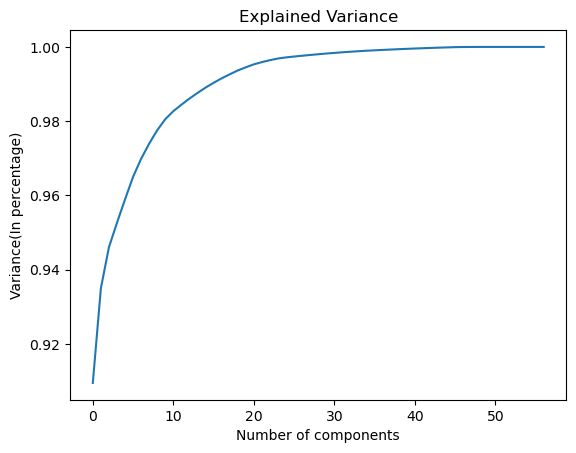

In [92]:
# importing the model
from sklearn.decomposition import PCA

# object creation
pca = PCA()

# fitting the data
principal_components = pca.fit_transform(X)

# creating new plot
plt.figure()

# creating a plot of the cumulative explained variance ratio of a PCA model.
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# adding a label to the x-axis of a plot
plt.xlabel('Number of components')

# adds a label to the y-axis of a plot
plt.ylabel('Variance(In percentage)') # for each component

# adding title to a plot
plt.title('Explained Variance')

# to display the new plot
plt.show()

In [93]:
# importing the model
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X1 = pca.fit_transform(X)

# Adding column names
X1 = pd.DataFrame(data=X1,columns=['PCA1','PCA2'])

print('shape of the data after PCA: ',X1.shape)

shape of the data after PCA:  (595212, 2)


In [94]:
# New PCA DataFrame

print(X1.head())

        PCA1      PCA2
0  50.233201 -2.274014
1  43.196191  4.626554
2   2.204617  7.418140
3 -41.803003  4.048704
4 -19.820713  7.211676


## Fetaure Scaling

In [95]:
# importing the model

'''from sklearn.preprocessing import MinMaxScaler

scale_mm = MinMaxScaler()
X = scale_mm.fit_transform(X1)'''

'from sklearn.preprocessing import MinMaxScaler\n\nscale_mm = MinMaxScaler()\nX = scale_mm.fit_transform(X1)'

 - Since there is no difference in accuracy score we will go with StandardScaler.

In [96]:
# importing StandardScaler to scale our data i.e transforming our data ranging between [-1,1]
from sklearn.preprocessing import StandardScaler

# object creation
scale_ss = StandardScaler()

# fitting the model
X1 = scale_ss.fit_transform(X1)

In [97]:
# Converting scaled data to DataFrame

X1 = pd.DataFrame(X1)

In [98]:
# To split a dataset into two subsets: one for training the model, and one for testing the model's performance.
from sklearn.model_selection import train_test_split


# Create train and test split
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.25,random_state=27)

# Note that for data of x1_train,x1_test,y1_train,y1_test, we have done PCA and Scaling

In [99]:
# Concatenating x1_train and y1_train

New_data_os_1 = pd.concat([x1_train,y1_train],axis=1)

# To display first five rows
New_data_os_1.head()

,0,1,target
170137,-0.811810,0.594053,1
172936,0.492426,-1.207486,0
482553,0.704392,-1.188801,0
266544,1.127969,-0.986297,0
547772,-0.599970,1.298219,0


In [100]:
# Oversampling
from sklearn.utils import resample

class_0 = New_data_os_1[New_data_os_1.target==0]# Class 0 is persons will not take insurance
class_1 = New_data_os_1[New_data_os_1.target==1]# Class 0 is persons will take insurance

# upsampled minority class 
class_upsampled = resample(class_1,
                           replace=True, # sample with replacement
                           n_samples=len(class_0), # match number in majority class
                           random_state=27) # reproducible results



# combine majority and upsampled minority 
upsampled = pd.concat([class_0, class_upsampled])

# check new class counts
upsampled.target.value_counts()

0    430182
1    430182
Name: target, dtype: int64

In [101]:
# To display first 5 rows of the dataset

upsampled.head()

,0,1,target
172936,0.492426,-1.207486,0
482553,0.704392,-1.188801,0
266544,1.127969,-0.986297,0
547772,-0.599970,1.298219,0
421781,-1.236013,0.732339,0


In [102]:
# Splitting oversampled train data

x_train_os_new = upsampled.drop('target', axis=1)
y_train_os_new = upsampled.target

## DecisionTree model for Oversampled data

In [103]:
# importing the model library
from sklearn.tree import DecisionTreeClassifier 

# object creation
model_DT_os = DecisionTreeClassifier(criterion = "entropy",
                                   class_weight = 'balanced',
                                   max_depth = 13,
                                   min_samples_split = 1000,
                                   min_samples_leaf = 100,
                                   ccp_alpha = 0.0001,
                                   random_state = 14)

# fitting the data
model_DT_os.fit(x_train_os_new,y_train_os_new)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=13, min_samples_leaf=100,
                       min_samples_split=1000, random_state=14)

In [104]:
# predicting the model

y_pred_dt_os = model_DT_os.predict(x1_test)

In [105]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_dt_os)

0.5066362909349946

In [106]:
# checking classification report for Decision Tree model

print(classification_report(y1_test,y_pred_dt_os))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66    143336
           1       0.04      0.59      0.08      5467

    accuracy                           0.51    148803
   macro avg       0.51      0.55      0.37    148803
weighted avg       0.94      0.51      0.64    148803



In [107]:
# using confusion matrix to evaluate the classifications of Decision Tree Model

confusion_matrix(y_test,y_pred_dt_os)


array([[72148, 71188],
       [ 2226,  3241]], dtype=int64)

## Random Forest model for Oversampled data

- The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions.
- Random Forests are a powerful and widely used machine learning algorithm that can handle a variety of data types and problem  types. They are known for their robustness, scalability, and ability to handle high-dimensional datasets with many features.

#### Using Random Tree Classifier Model

In [108]:
# importing model
from sklearn.ensemble import RandomForestClassifier


# Building model for Random Forest Classifier

model_RF_os = RandomForestClassifier(n_estimators=200, 
                                    class_weight='balanced',
                                    max_depth = 10,
                                    min_samples_split = 1000,
                                    min_samples_leaf = 500,
                                    ccp_alpha=0.001)

# fitting the data
model_RF_os.fit(x_train_os_new,y_train_os_new)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, min_samples_split=1000,
                       n_estimators=200)

In [109]:
# predicting the values

y_pred_RF_os = model_RF_os.predict(x1_test)

In [110]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_RF_os)

0.8059514929134494

In [111]:
# using confusion matrix to evaluate the classifications

confusion_matrix(y1_test,y_pred_RF_os)

array([[118753,  24583],
       [  4292,   1175]], dtype=int64)

In [112]:
# checking classification report for Random forest model

print(classification_report(y1_test,y_pred_RF_os))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89    143336
           1       0.05      0.21      0.08      5467

    accuracy                           0.81    148803
   macro avg       0.51      0.52      0.48    148803
weighted avg       0.93      0.81      0.86    148803



## XGBoost model for Oversampled data

- XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
- A wide range of applications: Can be used to solve regression, classification
- XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [113]:
# importing the model from library
from xgboost import XGBClassifier

# object creation
model_xgb_os = XGBClassifier(max_depth = 10,
                           learning_rate = 0.001,
                           scale_pos_weight = 1.50,
                           min_child_weight = 16,
                           reg_alpha = 1.0,
                           reg_lambda = 1.0,
                           gamma = 1.0,
                           n_estimators=200,
                           max_delta_step=1,
                           booster='gbtree',
                           subsample=1.0,
                           colsample_bytree =1.0,
                           grow_policy='depthwise',
                           tree_method='approx',
                           objective='binary:logitraw',
                           )

# fitting the data
model_xgb_os.fit(x_train_os_new,y_train_os_new)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=10,
              max_leaves=None, min_child_weight=16, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='binary:logitraw',
              predictor=None, ...)

In [114]:
# predicting the values

y_pred_xgb_os = model_xgb_os.predict(x1_test)

In [115]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_xgb_os)

0.7453411557562684

In [116]:
# using confusion matrix to evaluate the classifications of XGBoost Model

confusion_matrix(y1_test,y_pred_xgb_os)

array([[109103,  34233],
       [  3661,   1806]], dtype=int64)

In [117]:
# checking classification report for XGBoost Model

print(classification_report(y1_test,y_pred_xgb_os))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85    143336
           1       0.05      0.33      0.09      5467

    accuracy                           0.75    148803
   macro avg       0.51      0.55      0.47    148803
weighted avg       0.93      0.75      0.82    148803



- Since with oversampling technique we did not get good classified accuracy, we switched to Undersampling

# Undersampling
- Undersampling is a technique used in machine learning to address class imbalance problems. It involves reducing the number of instances in the majority class to match the number of instances in the minority class. This is typically done randomly, by randomly selecting a subset of the majority class instances that is the same size as the minority class.

In [118]:
# To split a dataset into two subsets: one for training the model and one for testing the model's performance.

from sklearn.model_selection import train_test_split

# Create train and test split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=27)

In [119]:
# Concatenating x_train and y_train

New_data_us = pd.concat([x_train,y_train],axis=1)
New_data_us.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
170137,3,1,4,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,1.2,1.904436,8,1,0,0,0,10,1,1,2,1,89,2,0.387298,0.909659,0.336155,3.316625,0.5,0.6,0.0,4,1,6,4,10,3,6,2,2,3,6,1,1,0,0,1,0,1
172936,1,1,6,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.6,0.2,0.641288,4,1,-1,0,0,0,1,1,0,1,46,3,0.400000,0.820338,0.366333,3.605551,0.3,0.1,0.5,0,2,7,2,7,3,3,6,4,1,5,0,1,1,1,0,0,0
482553,0,1,8,0,0,0,0,0,1,0,0,0,0,0,4,0,0,1,0.9,0.1,0.483477,7,1,-1,0,-1,0,1,1,2,1,39,3,0.316070,0.623987,0.374433,2.449490,0.0,0.2,0.9,3,3,9,3,10,2,6,3,1,3,7,0,0,0,0,0,0,0
266544,0,2,3,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.3,0.0,0.725431,10,1,-1,0,0,1,1,1,0,1,25,2,0.400000,0.857153,-1.000000,3.605551,0.0,0.7,0.2,3,1,8,5,10,0,10,5,0,4,10,0,1,1,0,0,0,0
547772,2,1,8,0,6,1,0,0,0,0,0,0,0,0,3,0,1,0,0.7,0.6,-1.000000,7,1,-1,0,-1,14,1,1,3,1,82,3,0.316070,0.575319,0.365103,2.236068,0.2,0.7,0.5,2,1,9,4,9,3,7,6,3,2,4,0,0,1,0,1,0,0


In [120]:
# Undersampling
from sklearn.utils import resample

class_0 = New_data_us[New_data_us.target==0] # class 0 is persons will not take insurance
class_1 = New_data_us[New_data_us.target==1] # class 0 is persons will take insurance

# undersample minority 
class_undersampled = resample(class_0,
                           replace=True, # sample with replacement
                           n_samples=len(class_1), # match number in majority class
                           random_state=27) # reproducible results



# combine majority and upsampled minority 
undersampled = pd.concat([class_1, class_undersampled])

# check new class counts
undersampled.target.value_counts()

1    16227
0    16227
Name: target, dtype: int64

In [121]:
# To display first 5 rows

undersampled.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
170137,3,1,4,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.9,1.2,1.904436,8,1,0,0,0,10,1,1,2,1,89,2,0.387298,0.909659,0.336155,3.316625,0.5,0.6,0.0,4,1,6,4,10,3,6,2,2,3,6,1,1,0,0,1,0,1
101629,1,2,0,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,0.4,0.811634,7,1,-1,0,-1,11,1,1,2,1,103,1,0.316228,0.645294,0.358329,3.464102,0.0,0.5,0.3,2,1,7,0,9,5,10,5,0,2,6,0,0,1,0,0,0,1
577988,7,1,7,1,0,0,1,0,0,0,0,0,0,0,5,1,0,0,0.6,0.4,0.755397,9,1,1,0,1,11,1,1,2,1,104,2,0.423792,0.576789,0.342053,0.000000,0.2,0.5,0.4,3,1,5,2,8,3,8,6,0,3,5,0,0,1,1,1,0,1
140790,0,2,0,1,-1,1,0,0,0,0,0,0,0,0,5,1,0,0,0.4,1.2,1.207787,11,1,1,0,1,9,-1,0,2,1,93,3,0.400000,0.903917,0.316228,3.605551,0.2,0.3,0.9,3,2,8,4,7,4,7,5,2,2,6,1,1,0,0,0,1,1
54559,1,1,1,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.9,0.4,0.947035,11,0,-1,0,-1,0,1,1,1,1,34,2,0.400000,0.868860,0.378021,3.316625,0.6,0.2,0.7,2,3,8,1,9,3,8,10,3,4,6,0,0,1,0,0,0,1


In [122]:
# splitting Undersampled x_train and y_train data

x_train_us = undersampled.drop('target', axis=1)
y_train_us = undersampled.target

## Logistic Regression model for 'UnderSampled' data

In [123]:
# importing model from the library
from sklearn.linear_model import LogisticRegression

# object creation
model_lr_us = LogisticRegression(solver='liblinear')

# fitting the model
model_lr_us.fit(x_train_us,y_train_us)

LogisticRegression(solver='liblinear')

In [124]:
# predicting the values

y_pred_lr_us = model_lr_us.predict(x_test)

In [125]:
# evaluating accuracy score

accuracy_score(y_test,y_pred_lr_us)

0.6142954107108055

In [126]:
# checking classification report for Logistic Regression model

print(classification_report(y_test,y_pred_lr_us))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75    143336
           1       0.05      0.56      0.10      5467

    accuracy                           0.61    148803
   macro avg       0.51      0.59      0.43    148803
weighted avg       0.94      0.61      0.73    148803



In [127]:
# using confusion matrix to evaluate the classifications for the Logistic Regression Model

confusion_matrix(y_test,y_pred_lr_us)

array([[88324, 55012],
       [ 2382,  3085]], dtype=int64)

In [128]:
# To split a dataset into two subsets: one for training the model and one for testing the model's performance.
from sklearn.model_selection import train_test_split


x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.25,random_state=27)

# Note that for data of x1_train,x1_test,y1_train,y1_test, we have done PCA and Scaling

In [129]:
# concatenating x1_train and y1_train data

New_data_us_1 = pd.concat([x1_train,y1_train],axis=1)
New_data_us_1.head()

,0,1,target
170137,-0.811810,0.594053,1
172936,0.492426,-1.207486,0
482553,0.704392,-1.188801,0
266544,1.127969,-0.986297,0
547772,-0.599970,1.298219,0


In [130]:
#Undersampling
from sklearn.utils import resample

class_0 = New_data_us_1[New_data_us_1.target==0] # class 0 is persons will not take insurance
class_1 = New_data_us_1[New_data_us_1.target==1] # class 1  is persons will take insurance

# unsample minority 
class_undersampled = resample(class_0,
                           replace=True, # sample with replacement
                           n_samples=len(class_1), # match number in majority class
                           random_state=27) # reproducible results



# combine majority and upsampled minority 
undersampled = pd.concat([class_1, class_undersampled])

# check new class counts
undersampled.target.value_counts()

1    16227
0    16227
Name: target, dtype: int64

In [131]:
# To display first 5 rows
undersampled.head()

,0,1,target
170137,-0.811810,0.594053,1
101629,-1.236053,0.730168,1
577988,-1.266329,0.792325,1
140790,-0.933177,0.404332,1
54559,0.855464,-1.159167,1


In [132]:
# splitting Undersampled x_train and y_train data

x_train_us_new = undersampled.drop('target', axis=1)
y_train_us_new = undersampled.target

## Random Forest Classifier model for 'UnderSampled' data

In [133]:
# importing the model from library
from sklearn.ensemble import RandomForestClassifier

# object creation
model_RF_us = RandomForestClassifier( n_estimators=200, 
                                      class_weight='balanced',
                                      max_depth = 10,
                                      min_samples_split = 1000,
                                      min_samples_leaf = 500,
                                      ccp_alpha=0.001
                                    )

# fitting the model
model_RF_us.fit(x_train_us_new,y_train_us_new)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=10,
                       min_samples_leaf=500, min_samples_split=1000,
                       n_estimators=200)

In [134]:
# predicting the values

y_pred_rf_us = model_RF_us.predict(x1_test)

In [135]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_rf_us)

0.8059783740919202

In [136]:
# checking classification report for the Random Forest model

print(classification_report(y1_test,y_pred_rf_us))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89    143336
           1       0.05      0.21      0.08      5467

    accuracy                           0.81    148803
   macro avg       0.51      0.52      0.48    148803
weighted avg       0.93      0.81      0.86    148803



In [137]:
# using confusion matrix to evaluate the classifications for the Random Forest model

confusion_matrix(y1_test,y_pred_rf_us)

array([[118757,  24579],
       [  4292,   1175]], dtype=int64)

- Since with undersampling technique we did not get good classified accuracy, we switched to SMOTE

# SMOTE-Synthetic Minority Over-sampling Technique

- SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique commonly used in machine learning to deal with imbalanced datasets. 
- It involves generating synthetic samples of the minority class by interpolating between existing minority class samples.

In [138]:
# To split a dataset into two subsets: one for training the model and one for testing the model's performance.

from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.25,random_state=27)

In [139]:
# checking the shape of train and test data
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(446409, 2)
(148803, 2)
(446409,)
(148803,)


In [140]:
# importing model from the library
from imblearn.over_sampling import SMOTE

#object creation
smote = SMOTE()

#fitting and resampling the data 
x_train_smote,y_train_smote = smote.fit_resample(x1_train,y1_train)

In [141]:
# importing Counter to check the number of items in both classes after SMOTE
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 430182, 1: 16227})
Counter({1: 430182, 0: 430182})


## Logistic Regression model for SMOTE data

In [142]:
# importing the model from library
from sklearn.linear_model import LogisticRegression

# object creation
model_lr_smote = LogisticRegression(solver='liblinear')

# fitting the model
model_lr_smote.fit(x_train_smote,y_train_smote)

LogisticRegression(solver='liblinear')

In [143]:
# predicting the values

y_pred_lr_smote = model_lr_smote.predict(x1_test)

In [144]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_lr_smote)

0.4900102820507651

In [145]:
# checking classification report for the Logistic Regression model

print(classification_report(y1_test,y_pred_lr_smote))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65    143336
           1       0.04      0.53      0.07      5467

    accuracy                           0.49    148803
   macro avg       0.50      0.51      0.36    148803
weighted avg       0.93      0.49      0.63    148803



In [146]:
# using confusion matrix to evaluate the classifications for the Logistic Model

confusion_matrix(y1_test,y_pred_lr_smote)

array([[70028, 73308],
       [ 2580,  2887]], dtype=int64)

## Decision Tree model for SMOTE data

In [147]:
# importing the model library
from sklearn.tree import DecisionTreeClassifier 

# object creation
model_DT_smote = DecisionTreeClassifier(criterion = "entropy",
                                        class_weight = 'balanced',
                                        max_depth = 13,
                                        min_samples_split = 1000,
                                        min_samples_leaf = 100,
                                        ccp_alpha = 0.0001,
                                        random_state = 14
                                       )

# fitting the data
model_DT_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=13, min_samples_leaf=100,
                       min_samples_split=1000, random_state=14)

In [148]:
# predicting the values

y_pred_dt_smote = model_DT_os.predict(x1_test)

In [149]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_dt_smote)

0.5066362909349946

In [150]:
# checking classification report for the Decision Tree model

print(classification_report(y1_test,y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.97      0.50      0.66    143336
           1       0.04      0.59      0.08      5467

    accuracy                           0.51    148803
   macro avg       0.51      0.55      0.37    148803
weighted avg       0.94      0.51      0.64    148803



In [151]:
# using confusion matrix to evaluate the classifications for the Decision Tree model

confusion_matrix(y1_test,y_pred_dt_smote)

array([[72148, 71188],
       [ 2226,  3241]], dtype=int64)

## XGBoost model for SMOTE data

- XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
- A wide range of applications: Can be used to solve regression, classification
- XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [152]:
# importing the model library
from xgboost import XGBClassifier

# object creation
model_xgb_smote = XGBClassifier( max_depth = 10,
                                 learning_rate = 0.001,
                                 scale_pos_weight = 0.80,
                                 min_child_weight = 16,
                                 reg_alpha = 1.0,
                                 reg_lambda = 1.0,
                                 gamma = 1.0,
                                 n_estimators=200,
                                 max_delta_step=1,
                                 booster='gbtree',
                                 subsample=1.0,
                                 colsample_bytree =1.0,
                                 grow_policy='depthwise',
                                 tree_method='approx',
                                 objective='binary:logistic'
                                 )
 
# fitting the data
model_xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, gpu_id=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=10,
              max_leaves=None, min_child_weight=16, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [153]:
# predicting the values

y_pred_xgb_smote = model_xgb_smote.predict(x1_test)

In [154]:
# evaluating accuracy score

accuracy_score(y1_test,y_pred_xgb_smote)

0.8112941271345335

In [155]:
# using confusion matrix to evaluate the classifications for the XGBClassifier

confusion_matrix(y1_test,y_pred_xgb_smote)

array([[119450,  23886],
       [  4194,   1273]], dtype=int64)

In [156]:
# checking classification report of the XGBClassifier

print(classification_report(y1_test,y_pred_xgb_smote))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89    143336
           1       0.05      0.23      0.08      5467

    accuracy                           0.81    148803
   macro avg       0.51      0.53      0.49    148803
weighted avg       0.93      0.81      0.87    148803



# Sequential Model

- A sequential model is a type of neural network architecture in which the data flows in a sequential order, one layer after the other. 
- In other words, the output from one layer is fed as input to the next layer and so on, until the final output is produced.

In [157]:
# Splitting the data into X and y

X = data.iloc[:,1:59]
y = data.target

In [158]:
X.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,1,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [159]:
# Scale the independent variables using Minmax scalar

from sklearn.preprocessing import MinMaxScaler

scale_mm = MinMaxScaler()

X = scale_mm.fit_transform(X)

In [160]:
# Converting scaled data to Dataframe

X = pd.DataFrame(X)

In [161]:
# To display first 5 rows of the dataset

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,0.285714,0.5,0.454545,1.0,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.846154,0.0,1.0,0.0,0.777778,0.111111,0.341026,0.9,1.0,0.0,0.0,1.0,0.235294,1.0,0.0,0.2,0.0,0.106796,0.75,0.618126,0.182438,0.837701,0.963624,0.666667,0.555556,0.222222,0.6,0.166667,1.000000,0.142857,0.714286,0.166667,0.3125,0.818182,0.1,0.714286,0.347826,0.0,1.0,1.0,0.0,0.0,1.0
1,0.142857,0.0,0.636364,0.5,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.0,0.0,1.0,0.888889,0.222222,0.350555,1.0,1.0,0.0,0.0,0.0,0.647059,1.0,1.0,0.6,0.0,0.174757,1.00,0.581139,0.106109,0.848643,0.654654,0.333333,0.111111,0.333333,0.4,0.166667,0.833333,0.714286,0.428571,0.166667,0.4375,0.272727,0.1,0.142857,0.391304,0.0,1.0,1.0,0.0,1.0,0.0
2,0.714286,0.0,0.818182,1.0,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.923077,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.6,1.0,0.0,0.0,0.0,0.823529,1.0,1.0,0.6,0.0,0.572816,0.50,0.581139,0.112670,0.823318,0.886405,0.555556,0.777778,0.111111,0.4,0.333333,0.833333,0.142857,0.428571,0.333333,0.4375,0.363636,0.2,1.000000,0.304348,0.0,1.0,1.0,0.0,1.0,0.0
3,0.000000,0.0,0.181818,0.5,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,1.0,0.0,0.0,1.000000,0.111111,0.313808,0.6,1.0,0.5,0.0,1.0,0.647059,1.0,1.0,0.8,0.0,1.000000,0.50,0.606720,0.084245,0.791347,0.534522,0.666667,1.000000,0.111111,0.4,0.666667,0.500000,0.142857,0.428571,0.666667,0.1250,0.181818,0.2,0.571429,0.391304,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.5,0.000000,1.0,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,1.0,0.0,0.0,0.777778,0.333333,0.365379,1.0,1.0,0.0,0.0,0.0,0.823529,1.0,1.0,0.6,0.0,0.786408,1.00,0.581069,0.090839,0.834213,0.534522,0.444444,0.666667,0.000000,0.4,0.333333,0.333333,0.428571,0.714286,0.333333,0.7500,0.272727,0.1,0.142857,0.130435,0.0,0.0,0.0,1.0,1.0,0.0


In [162]:
# Splitting the data for train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=27)

In [163]:
#checking the shape of train and test data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(476169, 57)
(476169,)
(119043, 57)
(119043,)


# SMOTE-Synthetic Minority Over-sampling Technique

- SMOTE (Synthetic Minority Over-sampling Technique) is a data augmentation technique commonly used in machine learning to deal with imbalanced datasets. It involves generating synthetic samples of the minority class by interpolating between existing minority class samples.

In [164]:
# importing model from the library
from imblearn.over_sampling import SMOTE

# object creation
smote = SMOTE()

# fitting and resampling the data 
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [165]:
# importing Counter to check the number of items in both classes after SMOTE

from collections import Counter

print(Counter(y_train))
print(Counter(y_train_smote))

Counter({0: 458824, 1: 17345})
Counter({0: 458824, 1: 458824})


In [166]:
# Getting the class counts in y_train

num_classes = len(np.unique(y_train_smote))
num_classes

2

In [167]:
# importing keras

from tensorflow import keras

In [168]:
# one-hot encode the training labels and the testing labels and converting the array value (class vector) into matrix

y_train_smote = keras.utils.to_categorical(y_train_smote, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes)

In [169]:
# checking the dimension after One Hot Encoding

print(x_train_smote.shape)
print(y_train_smote.shape)

(917648, 57)
(917648, 2)


In [170]:
# Splitting the data into Train and Validation set

(x_train, x_val) = x_train_smote[150000:], x_train_smote[:150000] 
(y_train, y_val) = y_train_smote[150000:], y_train_smote[:150000]

In [171]:
# Checking the shape of train, test and validation samples

print('Train samples: ',x_train.shape[0])
print('Test samples: ',x_test.shape[0])
print('Validation samples: ',x_val.shape[0])

Train samples:  767648
Test samples:  119043
Validation samples:  150000


In [172]:
# Importing sequential model and required layers

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout

# Setting the input shape
input_shape = (58,)

# Creating essential layers for model

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu', input_shape=(57,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [173]:
# Compiling the optimizer,loss and metrics inputs later setting to the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [174]:
# Fitting the model

history = model.fit(x=x_train, y=y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
23989/23989 [==============================] - 85s 3ms/step - loss: 0.5632 - accuracy: 0.7065 - val_loss: 0.5436 - val_accuracy: 0.7497
Epoch 2/20
23989/23989 [==============================] - 82s 3ms/step - loss: 0.4782 - accuracy: 0.7719 - val_loss: 0.5209 - val_accuracy: 0.7596
Epoch 3/20
23989/23989 [==============================] - 82s 3ms/step - loss: 0.4360 - accuracy: 0.7974 - val_loss: 0.4771 - val_accuracy: 0.7592
Epoch 4/20
23989/23989 [==============================] - 82s 3ms/step - loss: 0.4049 - accuracy: 0.8149 - val_loss: 0.5174 - val_accuracy: 0.7363
Epoch 5/20
23989/23989 [==============================] - 88s 4ms/step - loss: 0.3824 - accuracy: 0.8286 - val_loss: 0.4507 - val_accuracy: 0.8018
Epoch 6/20
23989/23989 [==============================] - 83s 3ms/step - loss: 0.3648 - accuracy: 0.8373 - val_loss: 0.3450 - val_accuracy: 0.8471
Epoch 7/20
23989/23989 [==============================] - 83s 3ms/step - loss: 0.3489 - accuracy: 0.8465 - val_loss: 0

In [175]:
# Predicting the values of y using x_test

y_pred = model.predict(x_test)

3721/3721 [==============================] - 5s 1ms/step


In [176]:
# Evaluating Accuracy Score

score = model.evaluate(x_test,y_test,verbose=0)

accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 81.2908%


# Project Outcomes & Conclusions:

## Here are some of the key outcomes of the project:

- The Dataset was large, totally around 6 lakhs samples & before preprocessing 2% of the datasamples were dropped.
- The samples were highly imbalanced hence over sampling, undersampling, SMOTE Technique were applied on the data to balance the classes to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
- The boosting & ensemble algorithms perform the best on the current dataset.


## Problems :

- The data is non linear and highly imbalanced which resulted in Over-fitting.
- It was difficult to understand data and pre-process it due to the data and feature names being irrelevant.
- The run time was high during fitting the model.
- Accuracy was good for few models but the problem was presence of several outliers whereas for few models accuracy was poor.
- There are misclassifications and handling them was difficult.
- GridSearchCV and RandomizedCV consumed lot of time and increase in parameters gave memory error. 


## Model Comparision Report :

- We used Logistic Regression, Decision Tree, Random Forest, XGBoost along with OverSampling, UnderSampling also SMOTE and PCA.
- The final model we applied is SEQUENTIAL MODEL which is preferred among all the models as it gave the best accuracy.